# Episode 15 — Re-Synthesizing Unitary Operators for Circuit Optimization

In this notebook, you will learn:
- How to create custom **unitary operations**.
- How to **re-synthesize** an existing subcircuit into a more efficient implementation.
- How Qiskit's **`transpile`** function can optimize circuits automatically.

Re-synthesis is useful when a portion of your circuit can be **collapsed** into fewer gates without changing its action on the qubits.

## 1. Creating a Custom Unitary
A unitary operation $U$ is a $2^n \times 2^n$ matrix that is norm-preserving and reversible.

Here we define a 2-qubit unitary and apply it directly to a quantum circuit.

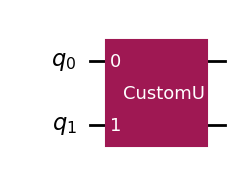

In [1]:
import numpy as np
from qiskit import QuantumCircuit

# Define a custom 2-qubit unitary (example: normalized Hadamard-like transform)
U = (1/2) * np.array([
    [1, 1, 1, 1],
    [1, -1, 1, -1],
    [1, 1, -1, -1],
    [1, -1, -1, 1]
], dtype=complex)

# Create a circuit and apply the unitary
qc = QuantumCircuit(2)
qc.unitary(U, [0, 1], label="CustomU")
qc.draw("mpl")

## 2. A Circuit that Could Be Optimized
Now let's build a circuit with **redundant gates** that could potentially be reduced to a more compact form.

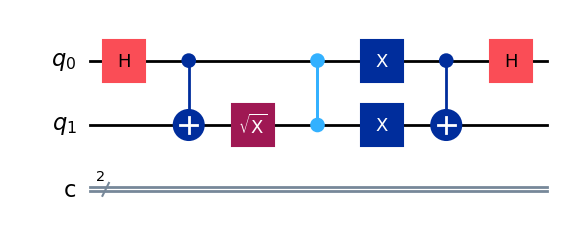

In [2]:
from qiskit import QuantumRegister, ClassicalRegister

qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg, creg)

# Intentional redundancy
circuit.h(0)
circuit.cx(0, 1)
circuit.sx(1)
circuit.cz(0, 1)
circuit.x(1)
circuit.x(0)
circuit.cx(0, 1)
circuit.h(0)

circuit.draw("mpl")

## 3. Re-Synthesizing the Circuit
We can extract the **unitary matrix** of this circuit and re-apply it as a single block, then decompose it into a minimal gate set.

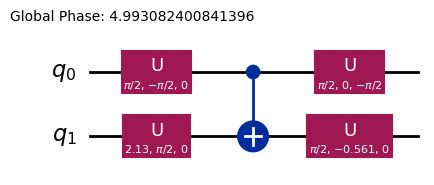

In [3]:
from qiskit.quantum_info import Operator

# Get the overall unitary of the original circuit
U_circuit = Operator(circuit)

# Create a new circuit with the same unitary
optimized_qc = QuantumCircuit(2)
optimized_qc.unitary(U_circuit, [0, 1])

# Decompose to see the actual gates
optimized_qc_decomp = optimized_qc.decompose()
optimized_qc_decomp.draw("mpl")

💡 **Observation:** The new decomposition often uses fewer two-qubit gates, which are the most error-prone in real hardware.

## 4. Automatic Optimization with `transpile`
Instead of manually re-synthesizing, Qiskit's `transpile` function can do this when given a high optimization level.

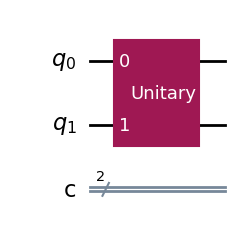

In [4]:
from qiskit import transpile

auto_optimized = transpile(circuit, optimization_level=3)
auto_optimized.draw("mpl")

## 5. Mini Challenge
**Task:**
- Create a 3-qubit circuit with at least 2 layers of gates that can be **collapsed** into a smaller equivalent.
- Use `Operator` to get the unitary and re-synthesize it into a new, smaller circuit.

<details>
<summary>💡 Click to reveal solution</summary>

```python
qc3 = QuantumCircuit(3)
qc3.h(0)
qc3.cx(0, 1)
qc3.cx(1, 2)
qc3.h(2)
qc3.z(0)
qc3.cx(1, 2)

U3 = Operator(qc3)
qc3_opt = QuantumCircuit(3)
qc3_opt.unitary(U3, [0, 1, 2])
qc3_opt = qc3_opt.decompose()
qc3_opt.draw("mpl")
```

</details>

## Additional information

**Created by:** Ricard Santiago Raigada García

**Version:** 1.0.0